In [1]:
import time
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import Markdown
from openvino.runtime import Core

# The paths of the source and converted models.
model_dir = Path("model")
model_dir.mkdir(exist_ok=True)

model_path = Path("model/v3-small_224_1.0_float")

ir_path = Path("model/v3-small_224_1.0_float.xml")

model = tf.keras.applications.MobileNetV3Small()
model.save(model_path)


INFO:tensorflow:Assets written to: model\v3-small_224_1.0_float\assets


INFO:tensorflow:Assets written to: model\v3-small_224_1.0_float\assets


In [2]:
mo_command = f"""mo
                 --saved_model_dir "{model_path}"
                 --input_shape "[1,224,224,3]"
                 --model_name "{model_path.name}"
                 --compress_to_fp16
                 --output_dir "{model_path.parent}"
                 """
mo_command = " ".join(mo_command.split())
print("Model Optimizer command to convert TensorFlow to OpenVINO:")

Model Optimizer command to convert TensorFlow to OpenVINO:


In [3]:
if not ir_path.exists():
    print("Exporting TensorFlow model to IR... This may take a few minutes.")
    ! $mo_command
else:
    print(f"IR model {ir_path} already exists.")

Exporting TensorFlow model to IR... This may take a few minutes.
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression by removing argument --compress_to_fp16 or set it to false --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvino.ai/latest/openvino_docs_MO_DG_FP16_Compression.html
[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework input/output format. While IR v11 is backwards compatible with OpenVINO Inference Engine API v1.0, please use API v2.0 (as of 2022.1) to take advantage of the latest improvements in IR v11.
Find more information about API v2.0 and IR v11 at https://docs.openvino.ai/latest/openvino_2_0_transition_guide.html
[ INFO ] IR generated by new TensorFlow Frontend is compatible only with API v2.0. Please make sure to use API v2.0.
Find more information about new TensorFlow Frontend at https://docs.openv

In [4]:
ie = Core()
model = ie.read_model(ir_path)
compiled_model = ie.compile_model(model=model, device_name="CPU")

In [5]:
input_key = compiled_model.input(0)
output_key = compiled_model.output(0)
network_input_shape = input_key.shape

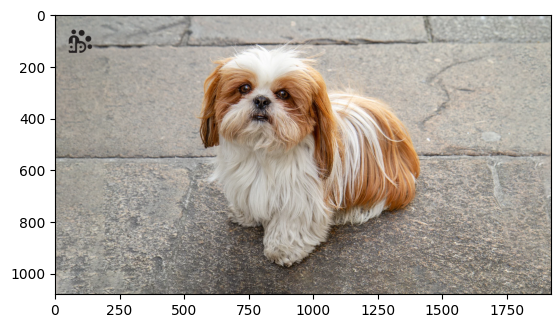

In [9]:
# The MobileNet network expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="Shih-Tzu.webp"), code=cv2.COLOR_BGR2RGB)

# Resize the image to the network input shape.
resized_image = cv2.resize(src=image, dsize=(224, 224))

# Transpose the image to the network input shape.
input_image = np.expand_dims(resized_image, 0)

plt.imshow(image);

In [10]:
result = compiled_model(input_image)[output_key]

result_index = np.argmax(result)

In [11]:
print(result_index)

154
